# Author: Makayla McKibben
## Course: DSC530 Data Exploration and Analysis
## Assignment: Term Project
## Date: 11.14.2024

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import warnings
import thinkstats2
import thinkplot
import hypothesis

In [3]:
# Remove future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Read df
reviews = pd.read_csv('Psychiatric_Drug_Reviews_WebMD.csv')

In [5]:
# Look at df
reviews.head(18)

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,0,Sertraline Oral,5/12/2024,45-54,Female,1 to less than 2 years,Patient,Posttraumatic Stress Syndrome,5.0,5,5,5,It's almost two years now and it has been so e...
1,1,Sertraline Oral,4/21/2024,35-44,Female,less than 1 month,Patient,Depression,1.0,1,1,1,Iv been on this 4 weeks and iv never felt so a...
2,2,Sertraline Oral,4/16/2024,25-34,Female,2 to less than 5 years,Patient,Repeated Episodes of Anxiety,4.3,4,4,5,Been taking sertraline for past 3 years. Had n...
3,3,Sertraline Oral,4/11/2024,45-54,Male,less than 1 month,Patient,Panic Disorder,1.7,1,3,1,"Of course, take this with a pinch of salt beca..."
4,4,Sertraline Oral,4/8/2024,13-18,Female,NaN,Patient,Major Depressive Disorder,3.0,2,4,3,used for a while saw no effects.
5,5,Sertraline Oral,3/29/2024,45-54,Female,less than 1 month,Patient,Posttraumatic Stress Syndrome,2.3,1,5,1,I had a concussion 9 months before I took this...
6,6,Sertraline Oral,3/27/2024,45-54,Female,1 to 6 months,Patient,Bipolar Depression,5.0,5,5,5,I was skeptical at first because I have been o...
7,7,Sertraline Oral,3/26/2024,12-Jul,Male,1 to 6 months,Caregiver,Repeated Episodes of Anxiety,5.0,5,5,5,My 9yo has moderate ADHD and this year the inc...
8,8,Sertraline Oral,3/17/2024,65-74,Female,2 to less than 5 years,Patient,Panic Disorder,3.7,4,3,4,It's okay but it makes you feel numb no joy or...
9,9,Sertraline Oral,2/25/2024,35-44,Female,NaN,Patient,Depressed Mood Disorder Occurring Every Year a...,1.0,1,1,1,I have depression that's a lot worse in winter...


In [6]:
# Look at all the conditions
reviews['condition'].unique()

array(['Posttraumatic Stress Syndrome', 'Depression',
       'Repeated Episodes of Anxiety', 'Panic Disorder',
       'Major Depressive Disorder', 'Bipolar Depression',
       'Depressed Mood Disorder Occurring Every Year at the Same Time',
       'Anxiousness associated with Depression', 'Other',
       'Obsessive Compulsive Disorder',
       'Extreme Apprehension or Fear of Social Interaction',
       'Premenstrual Disorder with a State of Unhappiness',
       'Premature Ejection of Semen', 'Problem Behavior', 'Schizophrenia',
       'Osteoporosis', 'Aggressive Behavior', 'Binge Eating Disorder',
       'Acute Repetitive Seizures', 'Anxious', 'Muscle Spasm',
       'Neuropathic Pain',
       'Attention Deficit Disorder with Hyperactivity', 'Stop Smoking',
       'Manic', 'Convulsive Seizures', 'Facial Nerve Pain',
       'Bipolar I Disorder with Most Recent Episode Mixed', 'Nerve Pain',
       'Bipolar Disorder in Remission', 'Epileptic Seizure', 'Tonic',
       'Prevention of Seizur

In [7]:
# Set lowered reviews = to the df
lowered_reviews = reviews

In [8]:
# Change all conditions to lowercase
lowered_reviews['condition'] = reviews['condition'].str.lower()

In [9]:
# Look at df
lowered_reviews.head(18)

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,0,Sertraline Oral,5/12/2024,45-54,Female,1 to less than 2 years,Patient,posttraumatic stress syndrome,5.0,5,5,5,It's almost two years now and it has been so e...
1,1,Sertraline Oral,4/21/2024,35-44,Female,less than 1 month,Patient,depression,1.0,1,1,1,Iv been on this 4 weeks and iv never felt so a...
2,2,Sertraline Oral,4/16/2024,25-34,Female,2 to less than 5 years,Patient,repeated episodes of anxiety,4.3,4,4,5,Been taking sertraline for past 3 years. Had n...
3,3,Sertraline Oral,4/11/2024,45-54,Male,less than 1 month,Patient,panic disorder,1.7,1,3,1,"Of course, take this with a pinch of salt beca..."
4,4,Sertraline Oral,4/8/2024,13-18,Female,NaN,Patient,major depressive disorder,3.0,2,4,3,used for a while saw no effects.
5,5,Sertraline Oral,3/29/2024,45-54,Female,less than 1 month,Patient,posttraumatic stress syndrome,2.3,1,5,1,I had a concussion 9 months before I took this...
6,6,Sertraline Oral,3/27/2024,45-54,Female,1 to 6 months,Patient,bipolar depression,5.0,5,5,5,I was skeptical at first because I have been o...
7,7,Sertraline Oral,3/26/2024,12-Jul,Male,1 to 6 months,Caregiver,repeated episodes of anxiety,5.0,5,5,5,My 9yo has moderate ADHD and this year the inc...
8,8,Sertraline Oral,3/17/2024,65-74,Female,2 to less than 5 years,Patient,panic disorder,3.7,4,3,4,It's okay but it makes you feel numb no joy or...
9,9,Sertraline Oral,2/25/2024,35-44,Female,NaN,Patient,depressed mood disorder occurring every year a...,1.0,1,1,1,I have depression that's a lot worse in winter...


In [10]:
# Keep only those who have schizophrenia with no mood disorder
schizophrenia_reviews = lowered_reviews[(lowered_reviews['condition'] == 'schizophrenia')]
schizophrenia_reviews

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
618,618,Haloperidol Intensol Oral,10/5/2010,35-44,Male,1 to 6 months,Patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous
1766,1766,Haloperidol Lactate Oral,8/26/2009,13-18,Female,1 to less than 2 years,Caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...
1769,1769,Trifluoperazine Oral,2/7/2014,45-54,Female,less than 1 month,Caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...
4034,4034,Chlorpromazine Injection,6/19/2009,45-54,Female,5 to less than 10 years,Patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...
4416,4416,Loxapine Succinate Oral,5/4/2011,45-54,Male,NaN,Patient,schizophrenia,5.0,5,5,5,I've been on loxapine since 1988 and I owe my ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61291,61291,Risperdal Oral,11/23/2007,55-64,Female,5 to less than 10 years,Patient,schizophrenia,3.3,3,4,3,I have been on risperdal for 7 years and I hav...
61295,61295,Risperdal Oral,11/18/2007,35-44,Female,1 to less than 2 years,Caregiver,schizophrenia,4.7,5,5,4,My husband has taken Risperdal for a year & a ...
61302,61302,Risperdal Oral,10/31/2007,25-34,Male,2 to less than 5 years,Patient,schizophrenia,3.3,3,4,3,The reoccurence is disturbing
61307,61307,Risperdal Oral,10/19/2007,25-34,Female,2 to less than 5 years,Patient,schizophrenia,4.3,4,5,4,Weight gain is an issue for me. Also my eyes s...


In [11]:
# Turn nan into NaN
schizophrenia_reviews = schizophrenia_reviews.replace('nan', np.nan)
schizophrenia_reviews

,Unnamed: 0,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
618,618,Haloperidol Intensol Oral,10/5/2010,35-44,Male,1 to 6 months,Patient,schizophrenia,4.7,5,5,4,it makes me feel restless and more nervous
1766,1766,Haloperidol Lactate Oral,8/26/2009,13-18,Female,1 to less than 2 years,Caregiver,schizophrenia,2.3,1,4,2,my daughter's halucinations are still present ...
1769,1769,Trifluoperazine Oral,2/7/2014,45-54,Female,less than 1 month,Caregiver,schizophrenia,1.0,1,1,1,my son have been diagnosed with schizophrenia ...
4034,4034,Chlorpromazine Injection,6/19/2009,45-54,Female,5 to less than 10 years,Patient,schizophrenia,1.0,1,1,1,in fact my mother is using it and it caused se...
4416,4416,Loxapine Succinate Oral,5/4/2011,45-54,Male,NaN,Patient,schizophrenia,5.0,5,5,5,I've been on loxapine since 1988 and I owe my ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61291,61291,Risperdal Oral,11/23/2007,55-64,Female,5 to less than 10 years,Patient,schizophrenia,3.3,3,4,3,I have been on risperdal for 7 years and I hav...
61295,61295,Risperdal Oral,11/18/2007,35-44,Female,1 to less than 2 years,Caregiver,schizophrenia,4.7,5,5,4,My husband has taken Risperdal for a year & a ...
61302,61302,Risperdal Oral,10/31/2007,25-34,Male,2 to less than 5 years,Patient,schizophrenia,3.3,3,4,3,The reoccurence is disturbing
61307,61307,Risperdal Oral,10/19/2007,25-34,Female,2 to less than 5 years,Patient,schizophrenia,4.3,4,5,4,Weight gain is an issue for me. Also my eyes s...


In [12]:
# Drop nan from df
schizophrenia_reviews.dropna(inplace = True)

In [13]:
# Find all NaN entries in schizophrenia
schizophrenia_reviews.isna().sum()

Unnamed: 0              0
drug_name               0
date                    0
age                     0
gender                  0
time_on_drug            0
reviewer_type           0
condition               0
rating_overall          0
rating_effectiveness    0
rating_ease_of_use      0
rating_satisfaction     0
text                    0
dtype: int64

In [14]:
# Find the age groups of the dataset
schizophrenia_reviews['age'].unique()

array(['35-44', '13-18', '45-54', '19-24', '65-74', '25-34', '55-64',
       '12-Jul', '6-Mar'], dtype=object)

In [15]:
# The 12-jul and 6-mar entries need to be removed from the ages. Will not affect the histogram plots to follow

Drop the 6-mar and 12-jul rows from the df

In [17]:
# Drop the incorrect age groups
schizophrenia_reviews.drop(schizophrenia_reviews[schizophrenia_reviews.age == '12-Jul'].index, inplace = True)
schizophrenia_reviews['age'].unique()

array(['35-44', '13-18', '45-54', '19-24', '65-74', '25-34', '55-64',
       '6-Mar'], dtype=object)

In [18]:
# Drop incorrect age groups
schizophrenia_reviews.drop(schizophrenia_reviews[schizophrenia_reviews.age == '6-Mar'].index, inplace = True)
schizophrenia_reviews['age'].unique()

array(['35-44', '13-18', '45-54', '19-24', '65-74', '25-34', '55-64'],
      dtype=object)

(array([201.,  32., 153., 104.,  24., 255.,  66.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

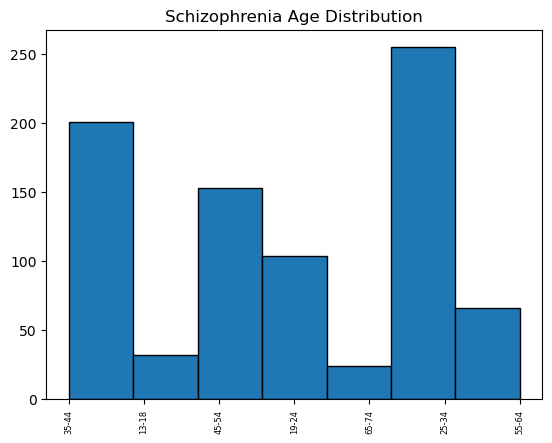

In [19]:
# Plot age group frequency
plt.xticks(rotation = 90, size = 6)
plt.title('Schizophrenia Age Distribution')
plt.hist(schizophrenia_reviews['age'], bins = 7, align = 'mid', edgecolor = 'black')

(array([115.,   0.,  37.,  35.,  69.,  32.,  50.,  46.,  61.,  67.,  70.,
          0., 253.]),
 array([1.        , 1.30769231, 1.61538462, 1.92307692, 2.23076923,
        2.53846154, 2.84615385, 3.15384615, 3.46153846, 3.76923077,
        4.07692308, 4.38461538, 4.69230769, 5.        ]),
 <BarContainer object of 13 artists>)

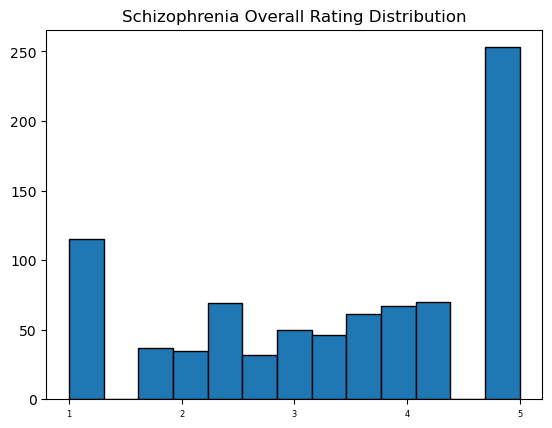

In [20]:
# Plot overall rating frequency
plt.xticks([1, 2, 3, 4, 5],  size = 6)
plt.title('Schizophrenia Overall Rating Distribution')
plt.hist(schizophrenia_reviews['rating_overall'], bins = 13, align = 'mid', edgecolor = 'black')

(array([182.,  76., 121., 167., 289.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

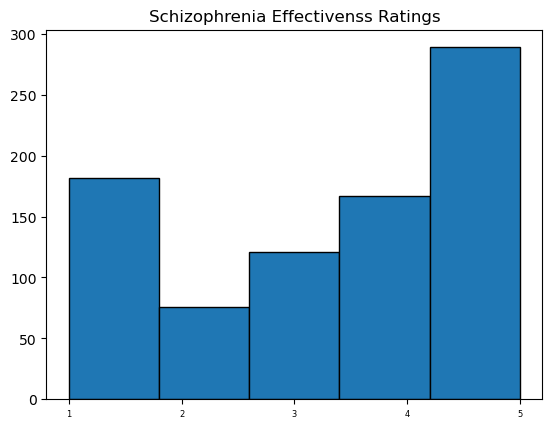

In [21]:
# Plot effectiveness rating frequency
plt.xticks([1, 2, 3, 4, 5], size = 6)
plt.title('Schizophrenia Effectivenss Ratings')
plt.hist(schizophrenia_reviews['rating_effectiveness'], bins = 5, align = 'mid', edgecolor = 'black')

(array([117.,  47.,  83., 141., 447.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

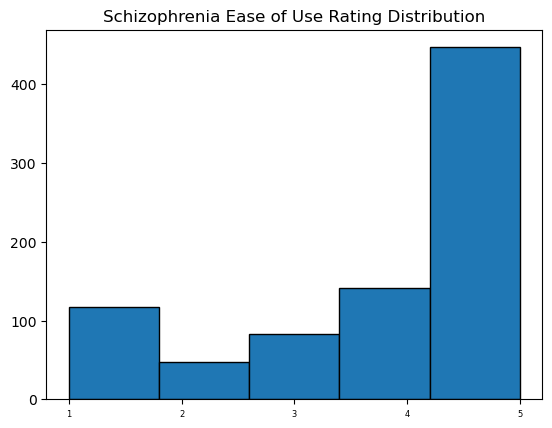

In [22]:
# Plot Ease of Use rating frequency
plt.xticks([1, 2, 3, 4, 5],  size = 6)
plt.title('Schizophrenia Ease of Use Rating Distribution')
plt.hist(schizophrenia_reviews['rating_ease_of_use'], bins = 5, align = 'mid', edgecolor = 'black')

(array([275.,  77., 133., 119., 231.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

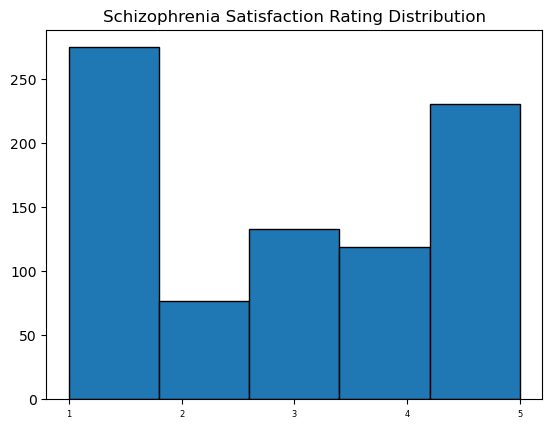

In [23]:
# Plot satisfaction rating frequency
plt.xticks([1, 2, 3, 4, 5],  size = 6)
plt.title('Schizophrenia Satisfaction Rating Distribution')
plt.hist(schizophrenia_reviews['rating_satisfaction'], bins = 5, align = 'mid', edgecolor = 'black')

In [24]:
# Look at all drug names
schizophrenia_reviews['drug_name'].unique()

array(['Haloperidol Intensol Oral', 'Haloperidol Lactate Oral',
       'Trifluoperazine Oral', 'Chlorpromazine Injection',
       'Chlorpromazine Oral', 'Fluphenazine Decanoate Injection',
       'Abilify Discmelt Oral', 'Paliperidone Oral', 'Invega Oral',
       'Seroquel XR Oral', 'Risperidone M-Tab Oral',
       'Paliperidone Palmitate Intramuscular',
       'Invega Sustenna Intramuscular', 'Asenapine Sublingual',
       'Saphris Sublingual', 'Fanapt Oral',
       'Olanzapine Pamoate Intramuscular', 'Lurasidone Oral',
       'Latuda Oral', 'Saphris (black Cherry) Sublingual',
       'Abilify Maintena Intramuscular', 'Olanzapine Oral',
       'Invega Trinza Intramuscular', 'Zyprexa Oral', 'Cariprazine Oral',
       'Vraylar Oral', 'Aristada Intramuscular', 'Caplyta Oral',
       'Zyprexa Zydis Oral', 'Ziprasidone Oral', 'Geodon Oral',
       'Quetiapine Oral', 'Seroquel Oral', 'Prolixin Decanoate Injection',
       'Fluphenazine Oral', 'Haldol Oral', 'Loxitane Oral',
       'Loxapine

In [25]:
# Group drugs
schizophrenia_reviews['grouped_meds'] = schizophrenia_reviews['drug_name'].str.lower()

In [26]:
schizophrenia_reviews['grouped_meds'].replace('haloperidol intensol oral', 'haldol', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('haloperidol lactate oral', 'haldol', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('haldol oral', 'haldol', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('haloperidol oral', 'haldol', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('haldol decanoate intramuscular', 'haldol', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('risperdal', 'risperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('risperidone m-tab oral', 'risperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('risperidone oral', 'risperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('risperidone microspheres intramuscular', 'risperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('risperdal consta intramuscular', 'risperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('risperdal oral', 'risperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('seroquel oral', 'quetiapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('quetiapine oral', 'quetiapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('seroquel xr oral', 'quetiapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('chlorpromazine injection', 'chlorpromzine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('chlorpromazine oral', 'chlorpromzine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('aripiprazole oral', 'abilify', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('abilify oral', 'abilify', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('abilify discmelt oral', 'abilify', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('abilify maintena intramuscular', 'abilify', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('aristada intramuscular', 'abilify', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('paliperidone oral', 'paliperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('paliperidone palmitate intramuscular', 'paliperidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('invega sustenna intramuscular', 'invega', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('invega trinza intramuscular', 'invega', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('invega oral', 'invega', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('zyprexa zydis oral', 'olanzapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('zyprexa oral', 'olanzapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('olanzapine oral', 'olanzapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('olanzapine pamoate intramuscular', 'olanzapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('loxapine oral', 'loxapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('loxapine succinate oral', 'loxapine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('fluphenazine decanoate injection', 'fluphenazine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('fluphenazine oral', 'fluphenazine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('prolixin oral', 'fluphenazine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('prolixin decanoate injection', 'fluphenazine', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('cariprazine oral', 'vraylar', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('vraylar oral', 'vraylar', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('lurasidone oral', 'lurasidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('latuda oral', 'lurasidone', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('saphris sublingual', 'saphris', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('saphris (black cherry) sublingual', 'saphris', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('asenapine sublingual', 'saphris', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('ziprasidone oral', 'geodon', inplace = True)
schizophrenia_reviews['grouped_meds'].replace('geodon oral', 'geodon', inplace = True)

In [27]:
# Look at all drug names
schizophrenia_reviews['grouped_meds'].unique()

array(['haldol', 'trifluoperazine oral', 'chlorpromzine', 'fluphenazine',
       'abilify', 'paliperidone', 'invega', 'quetiapine', 'risperidone',
       'saphris', 'fanapt oral', 'olanzapine', 'lurasidone', 'vraylar',
       'caplyta oral', 'geodon', 'loxitane oral', 'loxapine',
       'thiothixene oral', 'navane oral', 'trilafon oral', 'moban oral',
       'perphenazine oral', 'thorazine oral'], dtype=object)

In [28]:
# Set drug_names equal to our grouped_meds
schizophrenia_reviews['drug_name'] = schizophrenia_reviews['grouped_meds']

(array([ 31.,   1.,   5.,  29., 137.,   5.,  83., 152.,   0.,  92.,  37.,
         22.,  82.,  42.,   5.,  18.,  56.,   0.,   2.,   4.,   6.,   3.,
          5.,   2.,   8.,   8.]),
 array([ 0.        ,  0.88461538,  1.76923077,  2.65384615,  3.53846154,
         4.42307692,  5.30769231,  6.19230769,  7.07692308,  7.96153846,
         8.84615385,  9.73076923, 10.61538462, 11.5       , 12.38461538,
        13.26923077, 14.15384615, 15.03846154, 15.92307692, 16.80769231,
        17.69230769, 18.57692308, 19.46153846, 20.34615385, 21.23076923,
        22.11538462, 23.        ]),
 <BarContainer object of 26 artists>)

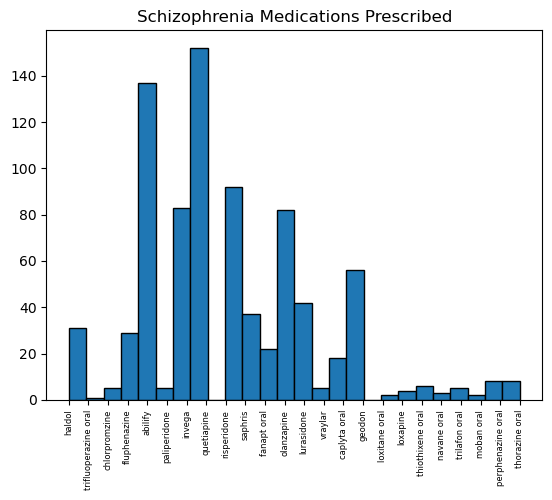

In [29]:
# Plot medication frequency
plt.xticks(rotation = 90, size = 6)
plt.title('Schizophrenia Medications Prescribed')
plt.hist(schizophrenia_reviews['drug_name'], bins = 26, align = 'mid', edgecolor = 'black')

In [30]:
# Group drugs by male and female frequency
female = schizophrenia_reviews.query("gender == 'Female'")['drug_name']
male = schizophrenia_reviews.query("gender == 'Male'")['drug_name']

(array([16.,  1.,  3., 71.,  3., 27., 81., 23.,  9., 41., 25.,  3.,  9.,
        30., 14.,  1.,  3.,  3., 48.,  2.,  2.,  2.,  4.,  6.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

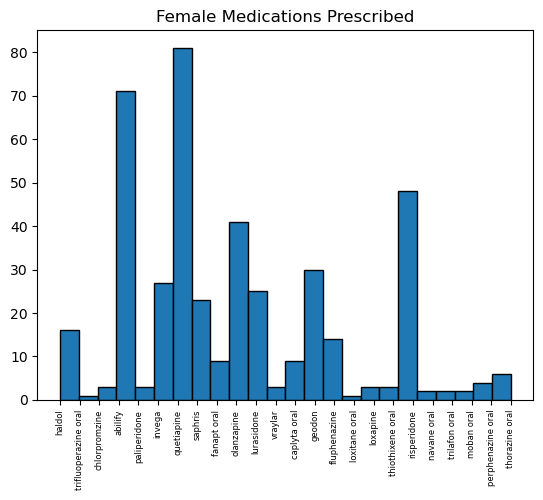

In [31]:
# Plot medication frequency females
plt.xticks(rotation = 90, size = 6)
plt.title('Female Medications Prescribed')
plt.hist(female, bins = 24, align = 'mid', edgecolor = 'black')

(array([15.,  2., 15.,  2., 56., 71., 44.,  0., 14., 13., 17., 41.,  2.,
         9., 26.,  0.,  1.,  1.,  3., 66.,  1.,  3.,  4.,  2.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,
         7.   ,  7.875,  8.75 ,  9.625, 10.5  , 11.375, 12.25 , 13.125,
        14.   , 14.875, 15.75 , 16.625, 17.5  , 18.375, 19.25 , 20.125,
        21.   ]),
 <BarContainer object of 24 artists>)

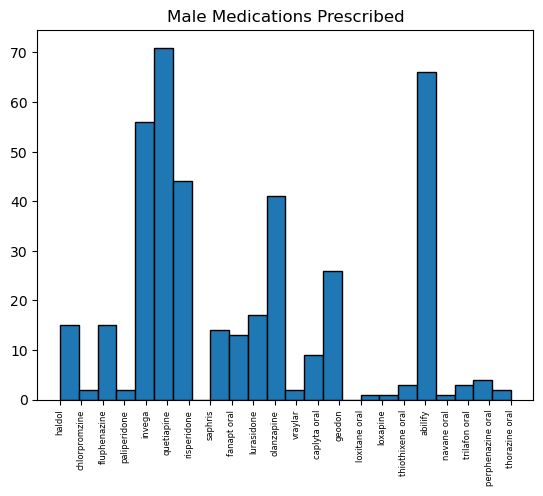

In [32]:
# Plot medication frequency males
plt.xticks(rotation = 90, size = 6)
plt.title('Male Medications Prescribed')
plt.hist(male, bins = 24, align = 'mid', edgecolor = 'black')

In [33]:
# Create the dfs for each age group
schizo_ages_13_18 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '13-18')]
schizo_ages_19_24 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '19-24')]
schizo_ages_25_34 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '25-34')]
schizo_ages_35_44 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '35-44')]
schizo_ages_45_54 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '45-54')]
schizo_ages_55_64 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '55-64')]
schizo_ages_65_74 = schizophrenia_reviews[(schizophrenia_reviews['age'] == '65-74')]

#### Make all the plots for medications popularity per age group

(array([ 4.,  3.,  1.,  1.,  0.,  4.,  2.,  3., 10.,  4.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

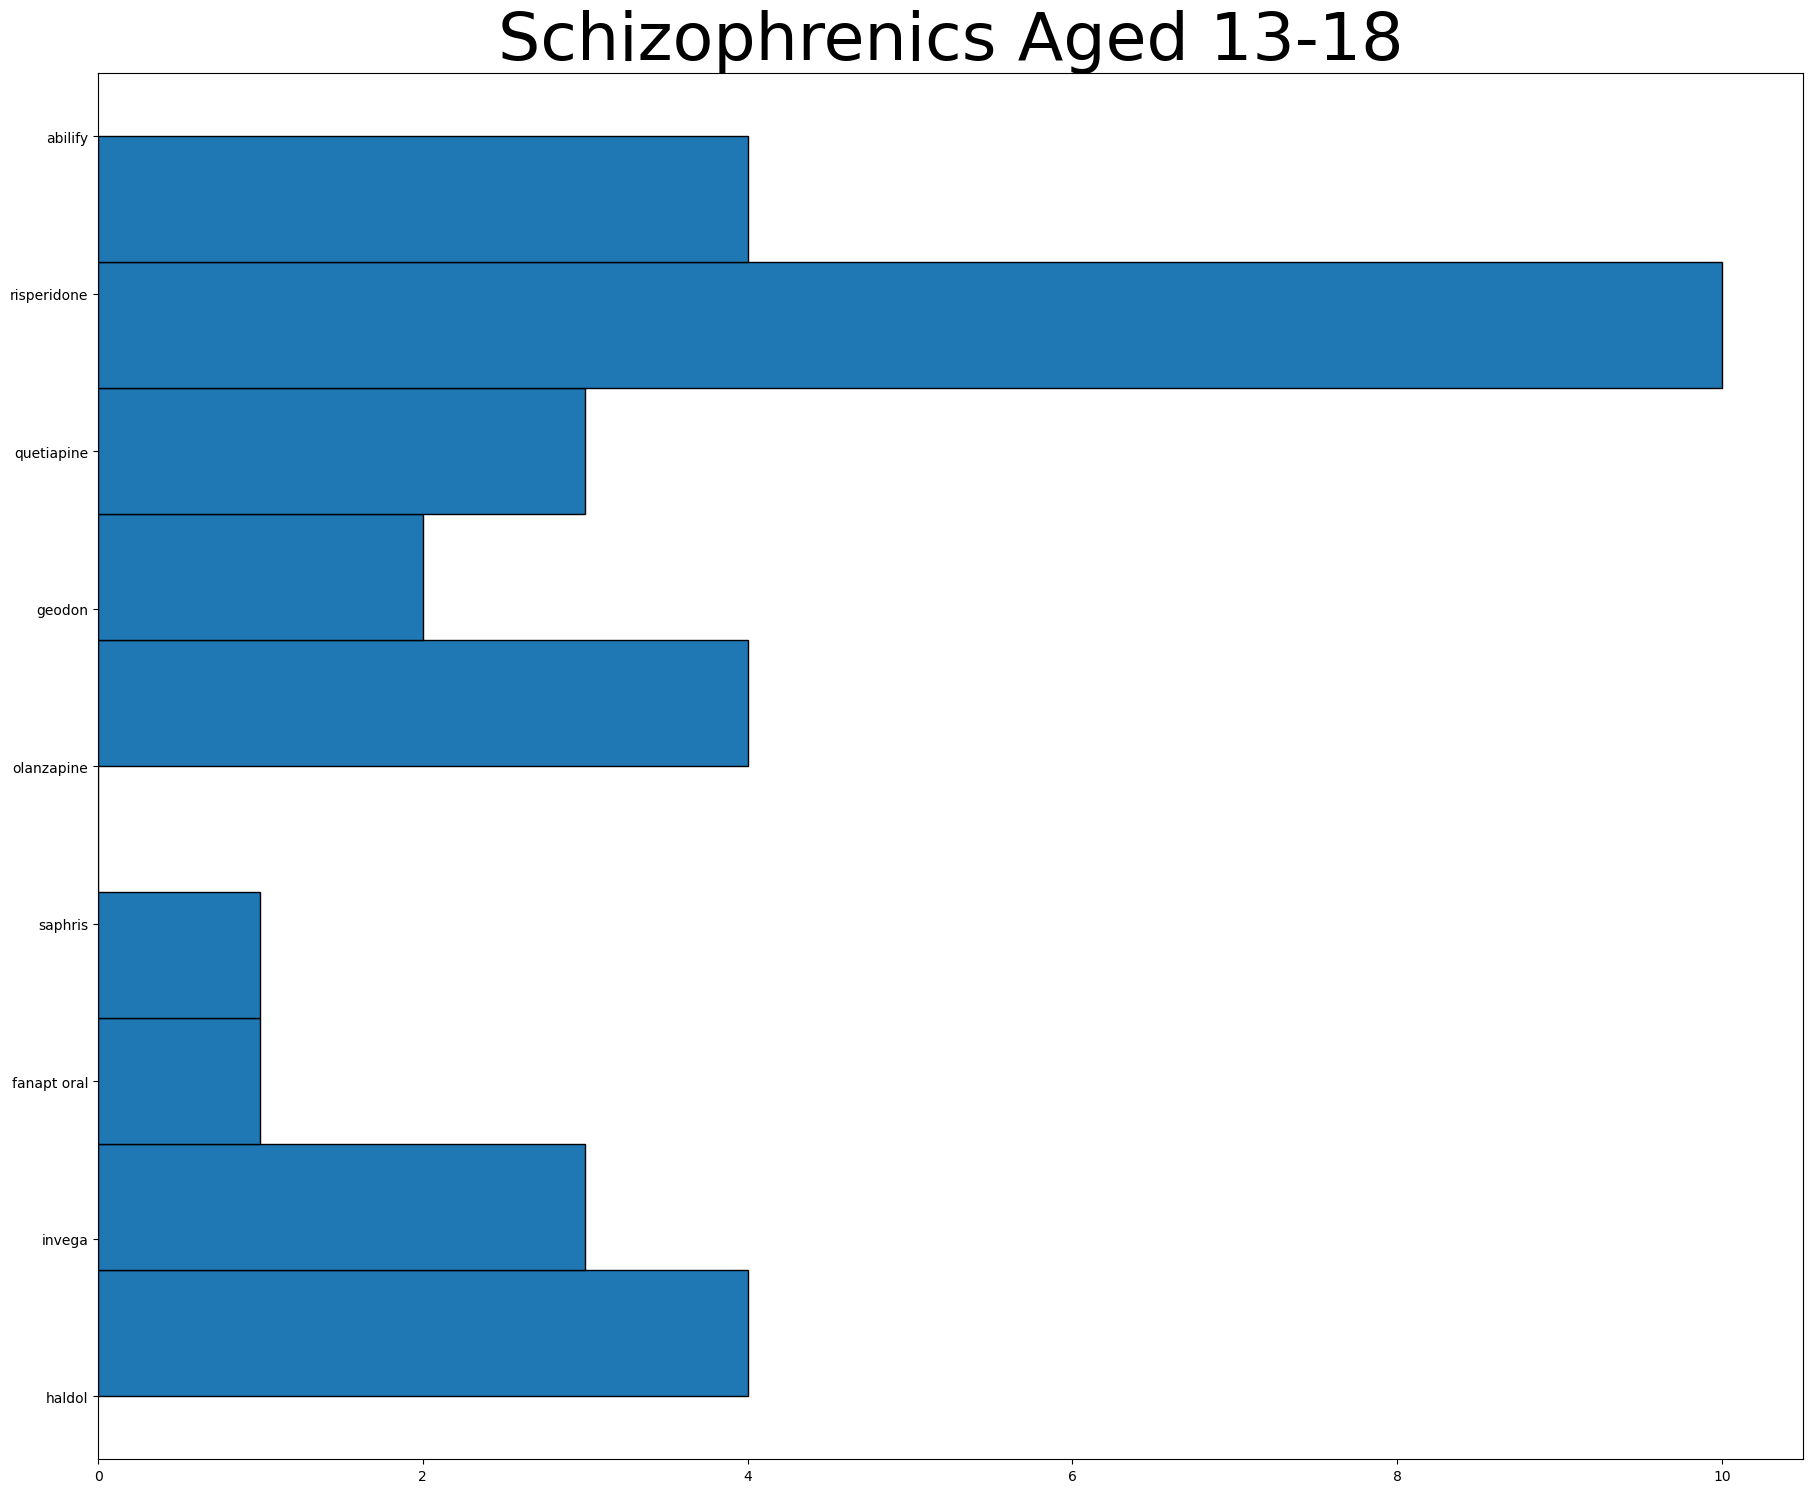

In [35]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 13-18', size = 48)
plt.hist(schizo_ages_13_18['drug_name'], bins = 10, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  4., 20., 16.,  3.,  3.,  2., 13.,  4.,  9.,  4.,  1., 11.,
        10.,  2.,  1.]),
 array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625, 15.    ]),
 <BarContainer object of 16 artists>)

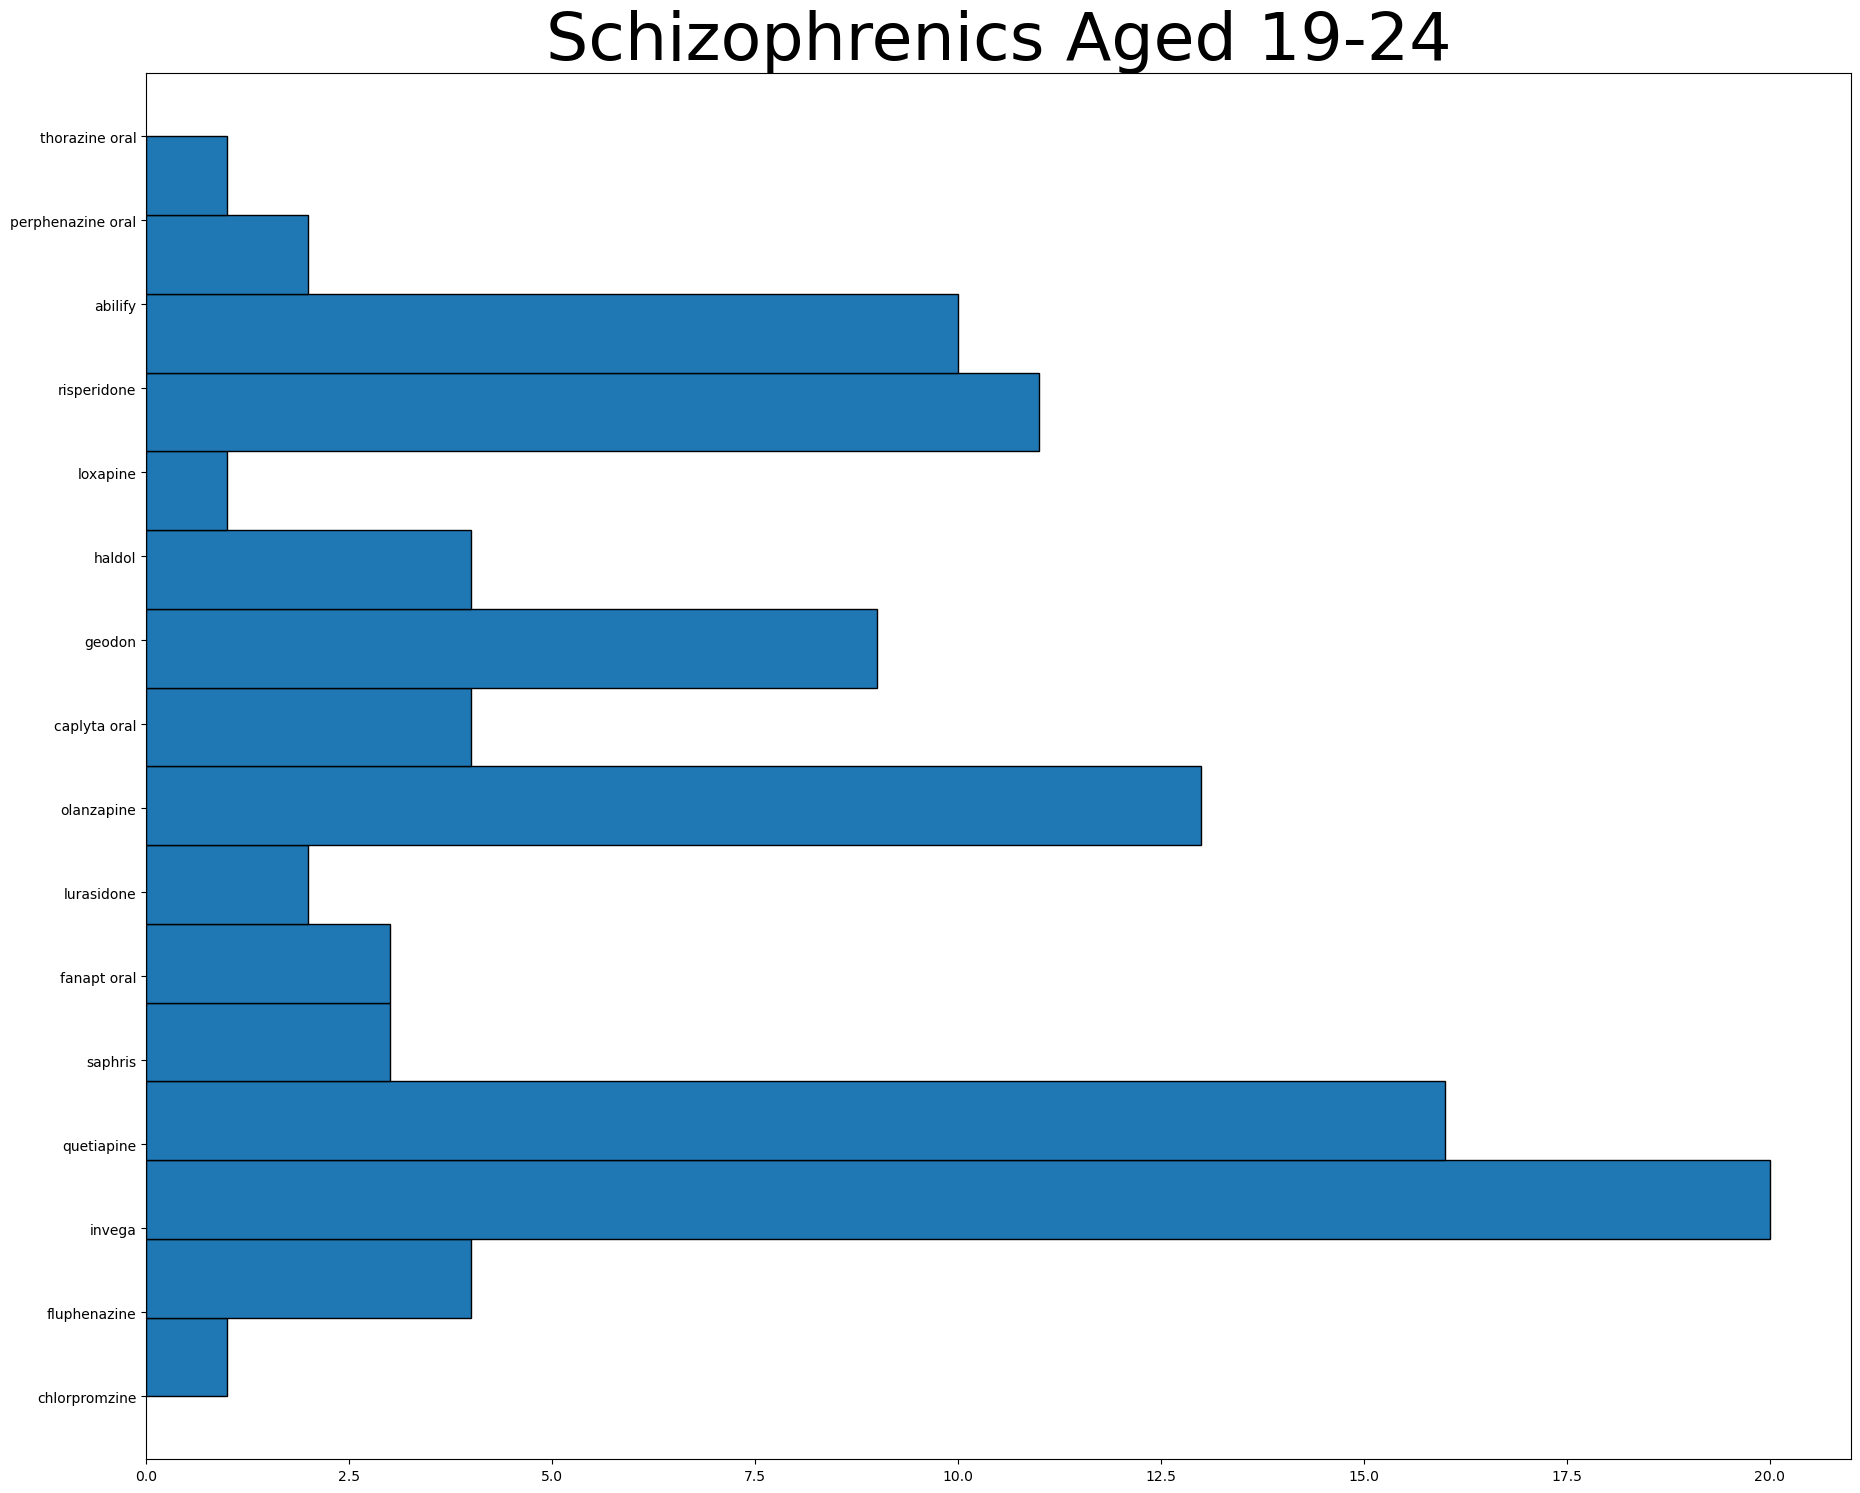

In [36]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 19-24', size = 48)
plt.hist(schizo_ages_19_24['drug_name'], bins = 16, edgecolor = 'black', orientation = 'horizontal')

(array([ 1., 24., 53.,  1.,  9., 11.,  9., 24., 46.,  0., 10., 13.,  9.,
         6.,  1., 31.,  1.,  3.,  3.]),
 array([ 0.        ,  0.89473684,  1.78947368,  2.68421053,  3.57894737,
         4.47368421,  5.36842105,  6.26315789,  7.15789474,  8.05263158,
         8.94736842,  9.84210526, 10.73684211, 11.63157895, 12.52631579,
        13.42105263, 14.31578947, 15.21052632, 16.10526316, 17.        ]),
 <BarContainer object of 19 artists>)

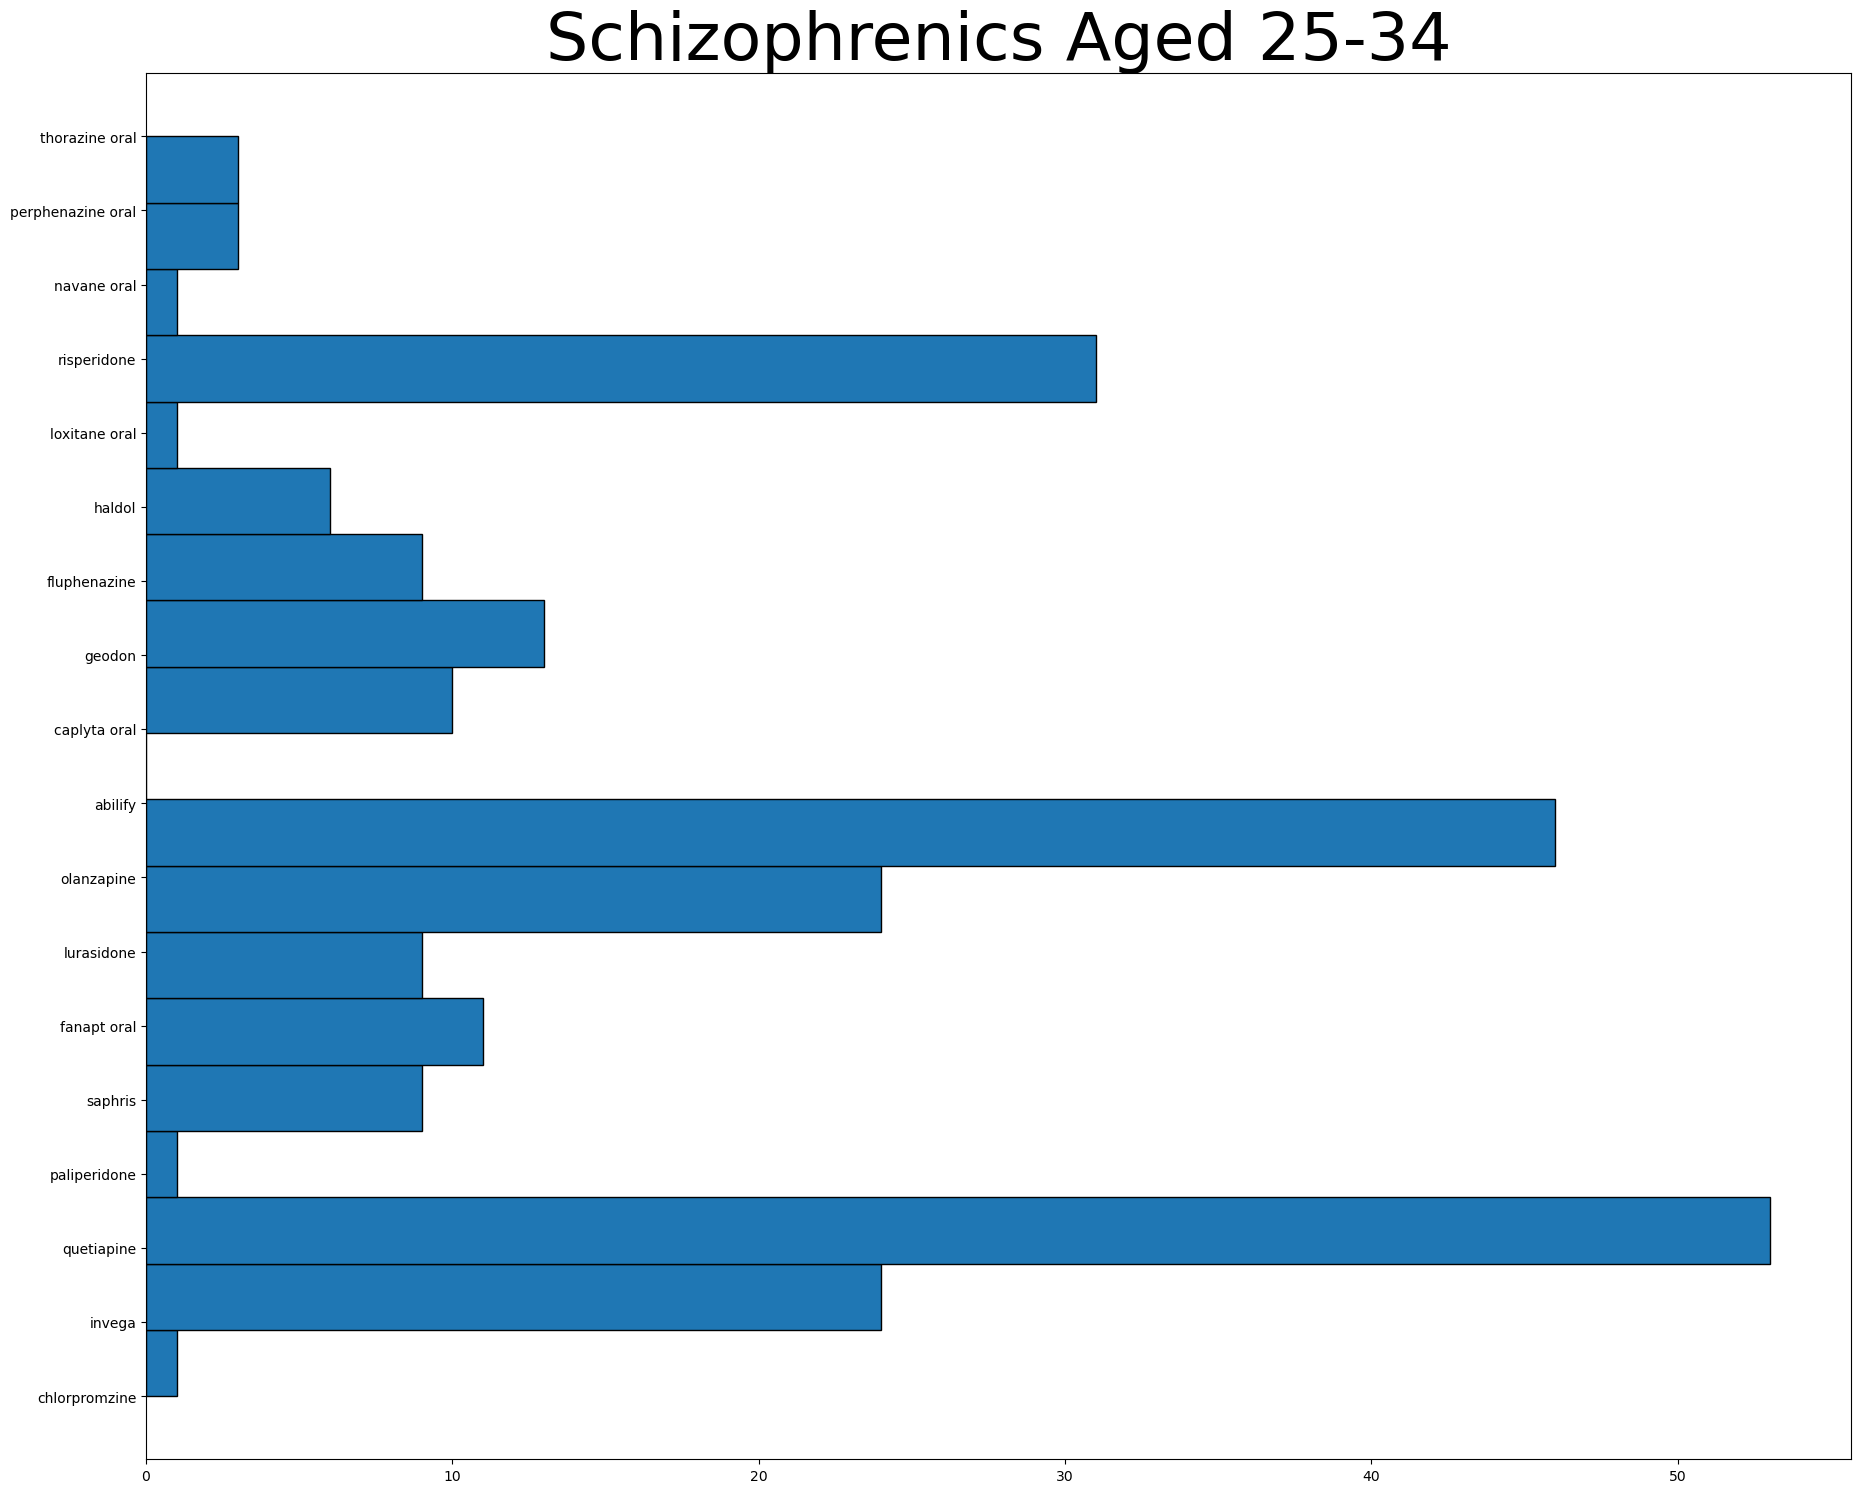

In [37]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 25-34', size = 48)
plt.hist(schizo_ages_25_34['drug_name'], bins = 19, edgecolor = 'black', orientation = 'horizontal')

(array([ 6.,  1.,  7., 36.,  2., 18., 37., 15.,  8.,  4., 15., 15.,  1.,
         3., 21.,  1.,  1.,  1.,  1.,  3.,  2.,  3.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <BarContainer object of 22 artists>)

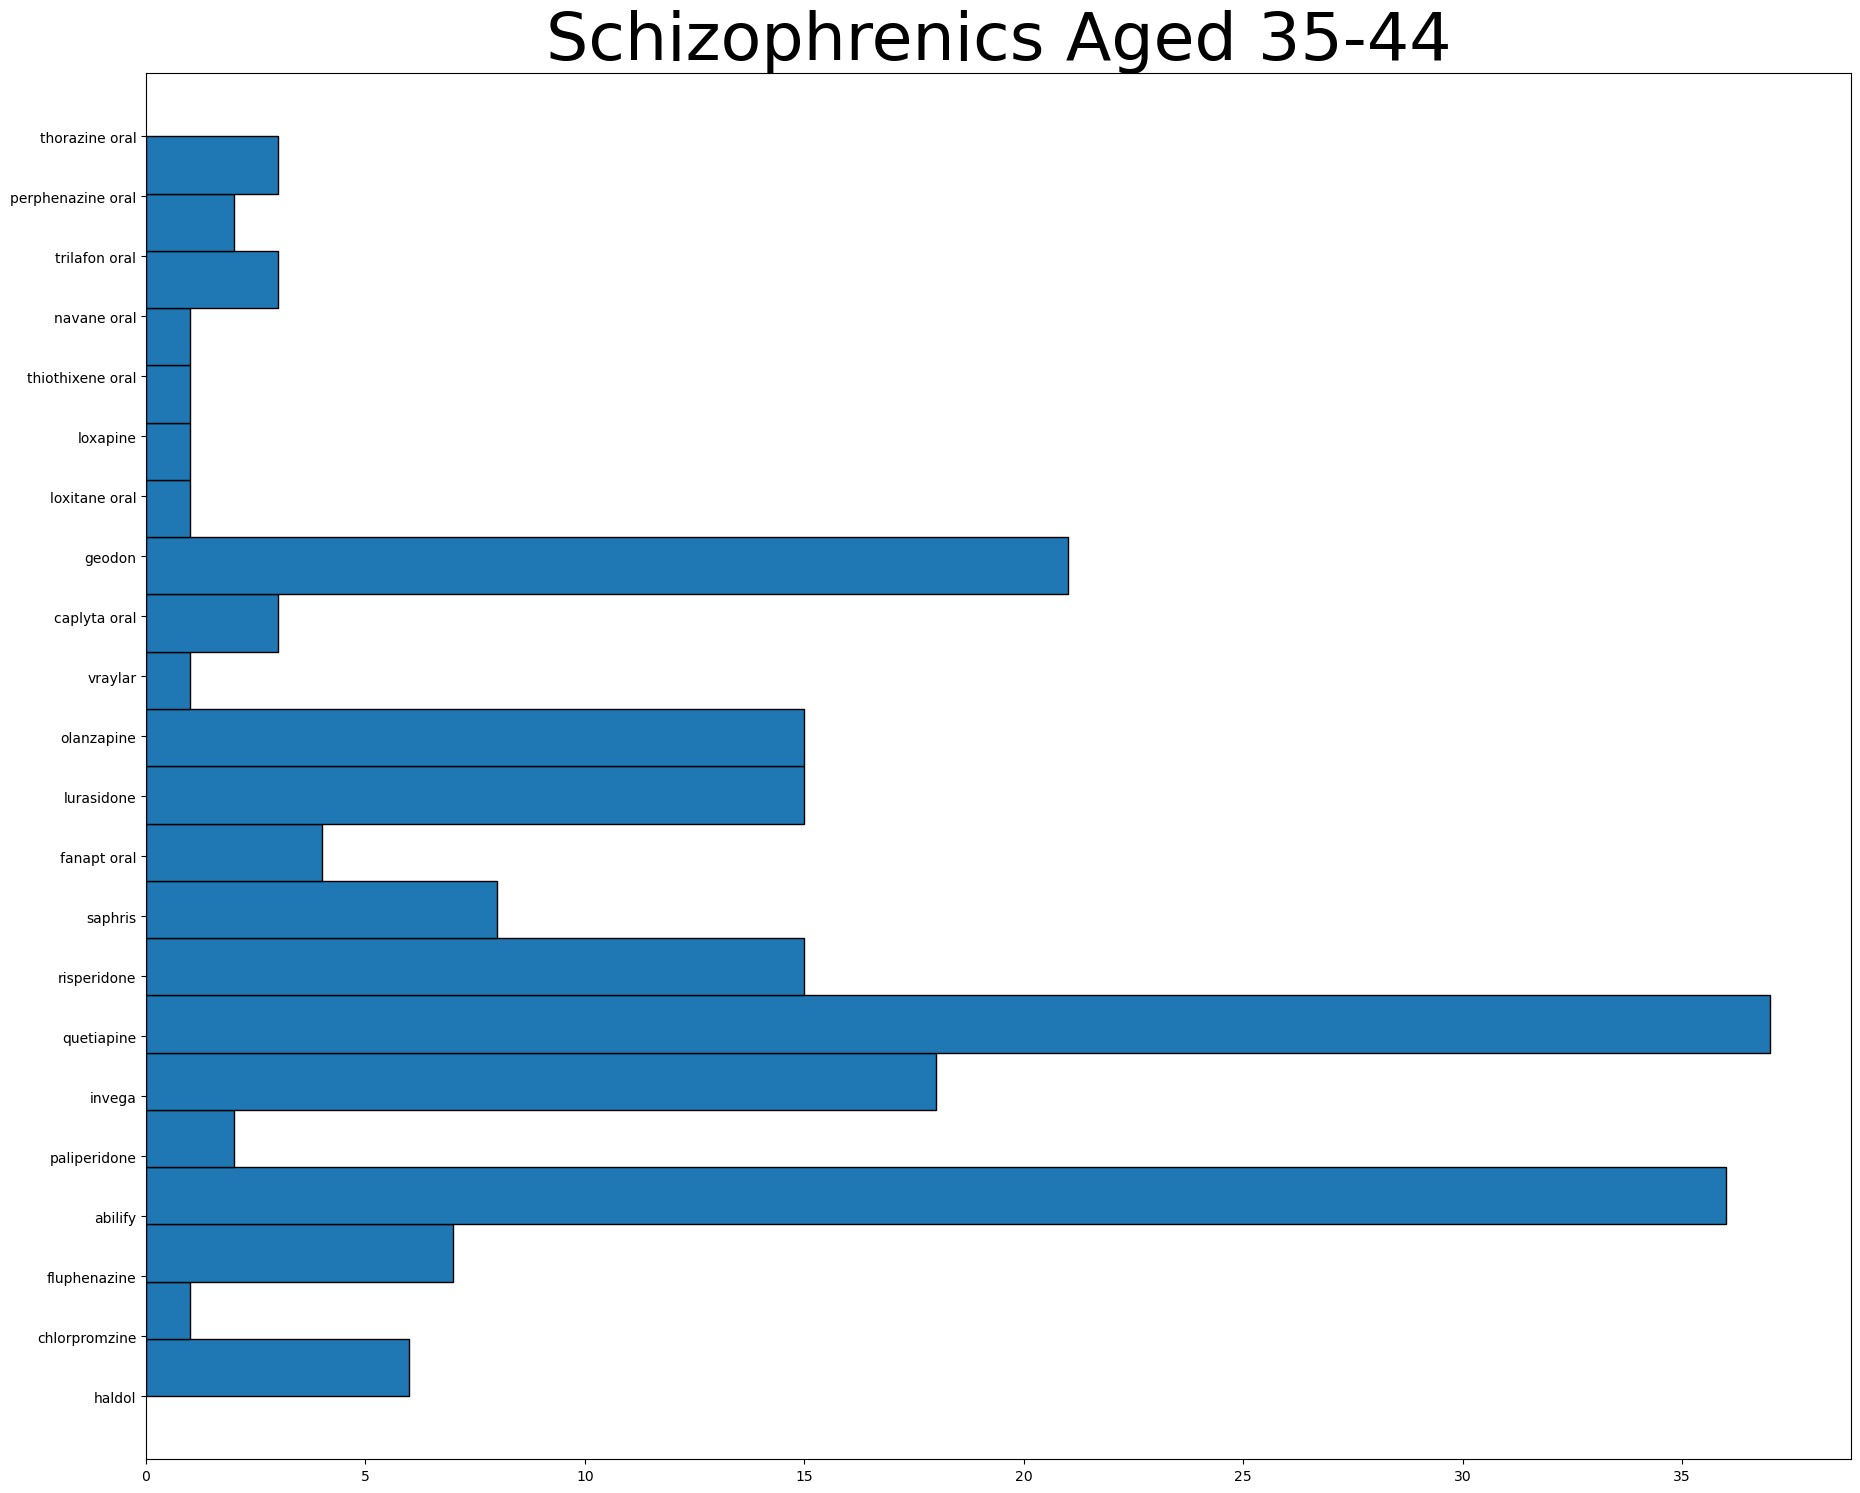

In [38]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 35-44', size = 48)
plt.hist(schizo_ages_35_44['drug_name'], bins = 22, edgecolor = 'black', orientation = 'horizontal')

(array([ 1.,  1., 11., 30.,  1.,  9.,  2., 13.,  9.,  2.,  0., 26.,  1.,
         9.,  4.,  9.,  1.,  3., 18.,  2.,  1.]),
 array([ 0.        ,  0.9047619 ,  1.80952381,  2.71428571,  3.61904762,
         4.52380952,  5.42857143,  6.33333333,  7.23809524,  8.14285714,
         9.04761905,  9.95238095, 10.85714286, 11.76190476, 12.66666667,
        13.57142857, 14.47619048, 15.38095238, 16.28571429, 17.19047619,
        18.0952381 , 19.        ]),
 <BarContainer object of 21 artists>)

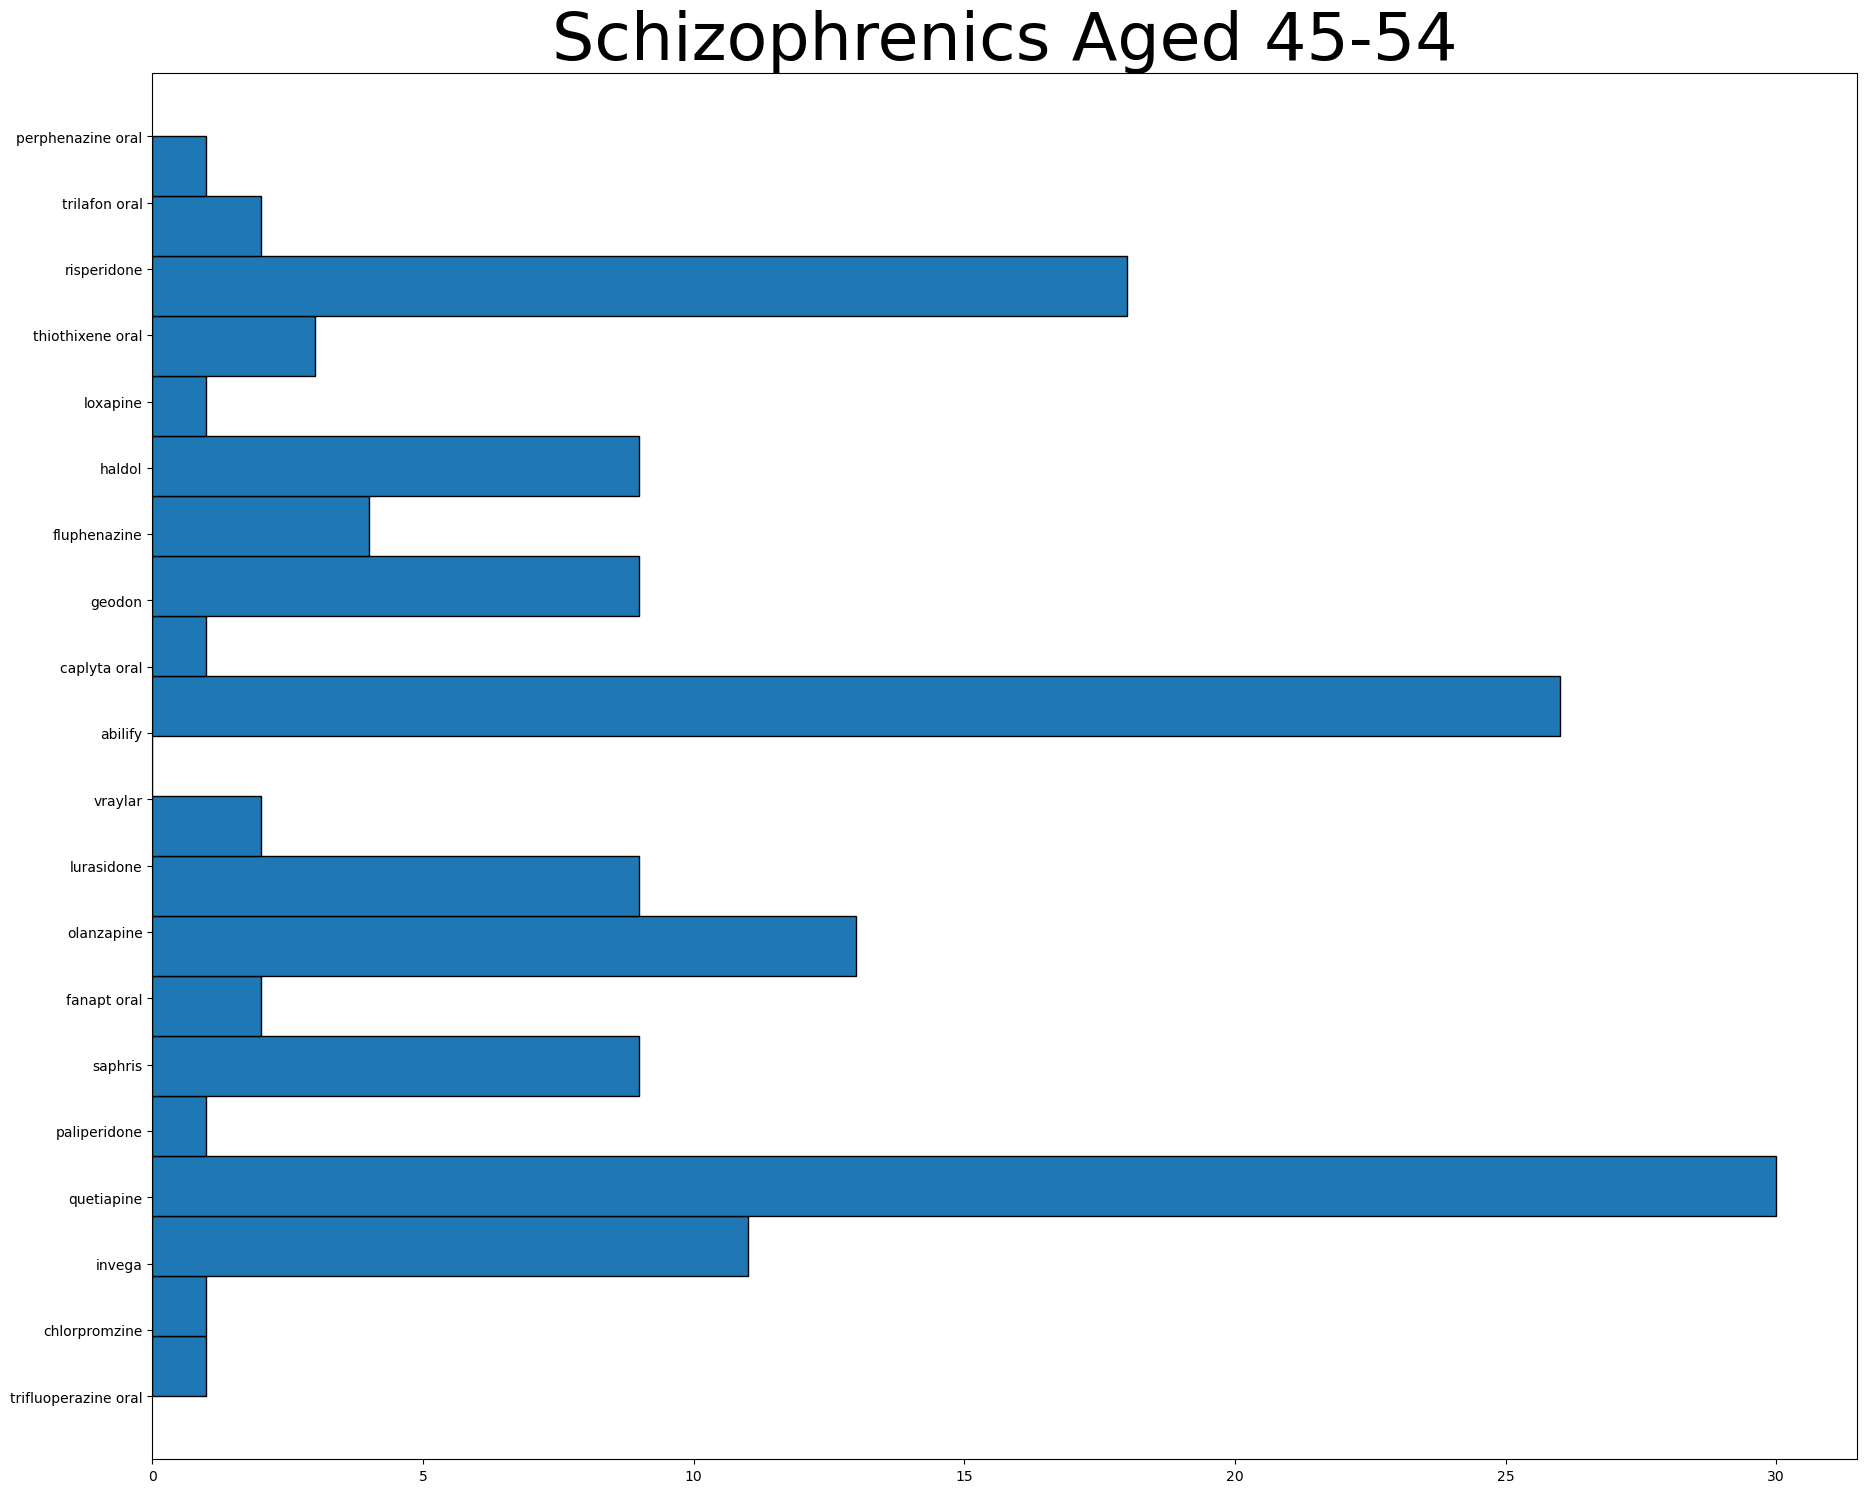

In [39]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 45-54', size = 48)
plt.hist(schizo_ages_45_54['drug_name'], bins = 21, edgecolor = 'black', orientation = 'horizontal')

(array([ 5.,  1.,  4.,  6.,  6.,  1.,  6.,  0., 11.,  8.,  2.,  2.,  8.,
         2.,  2.,  2.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,
         7.   ,  7.875,  8.75 ,  9.625, 10.5  , 11.375, 12.25 , 13.125,
        14.   ]),
 <BarContainer object of 16 artists>)

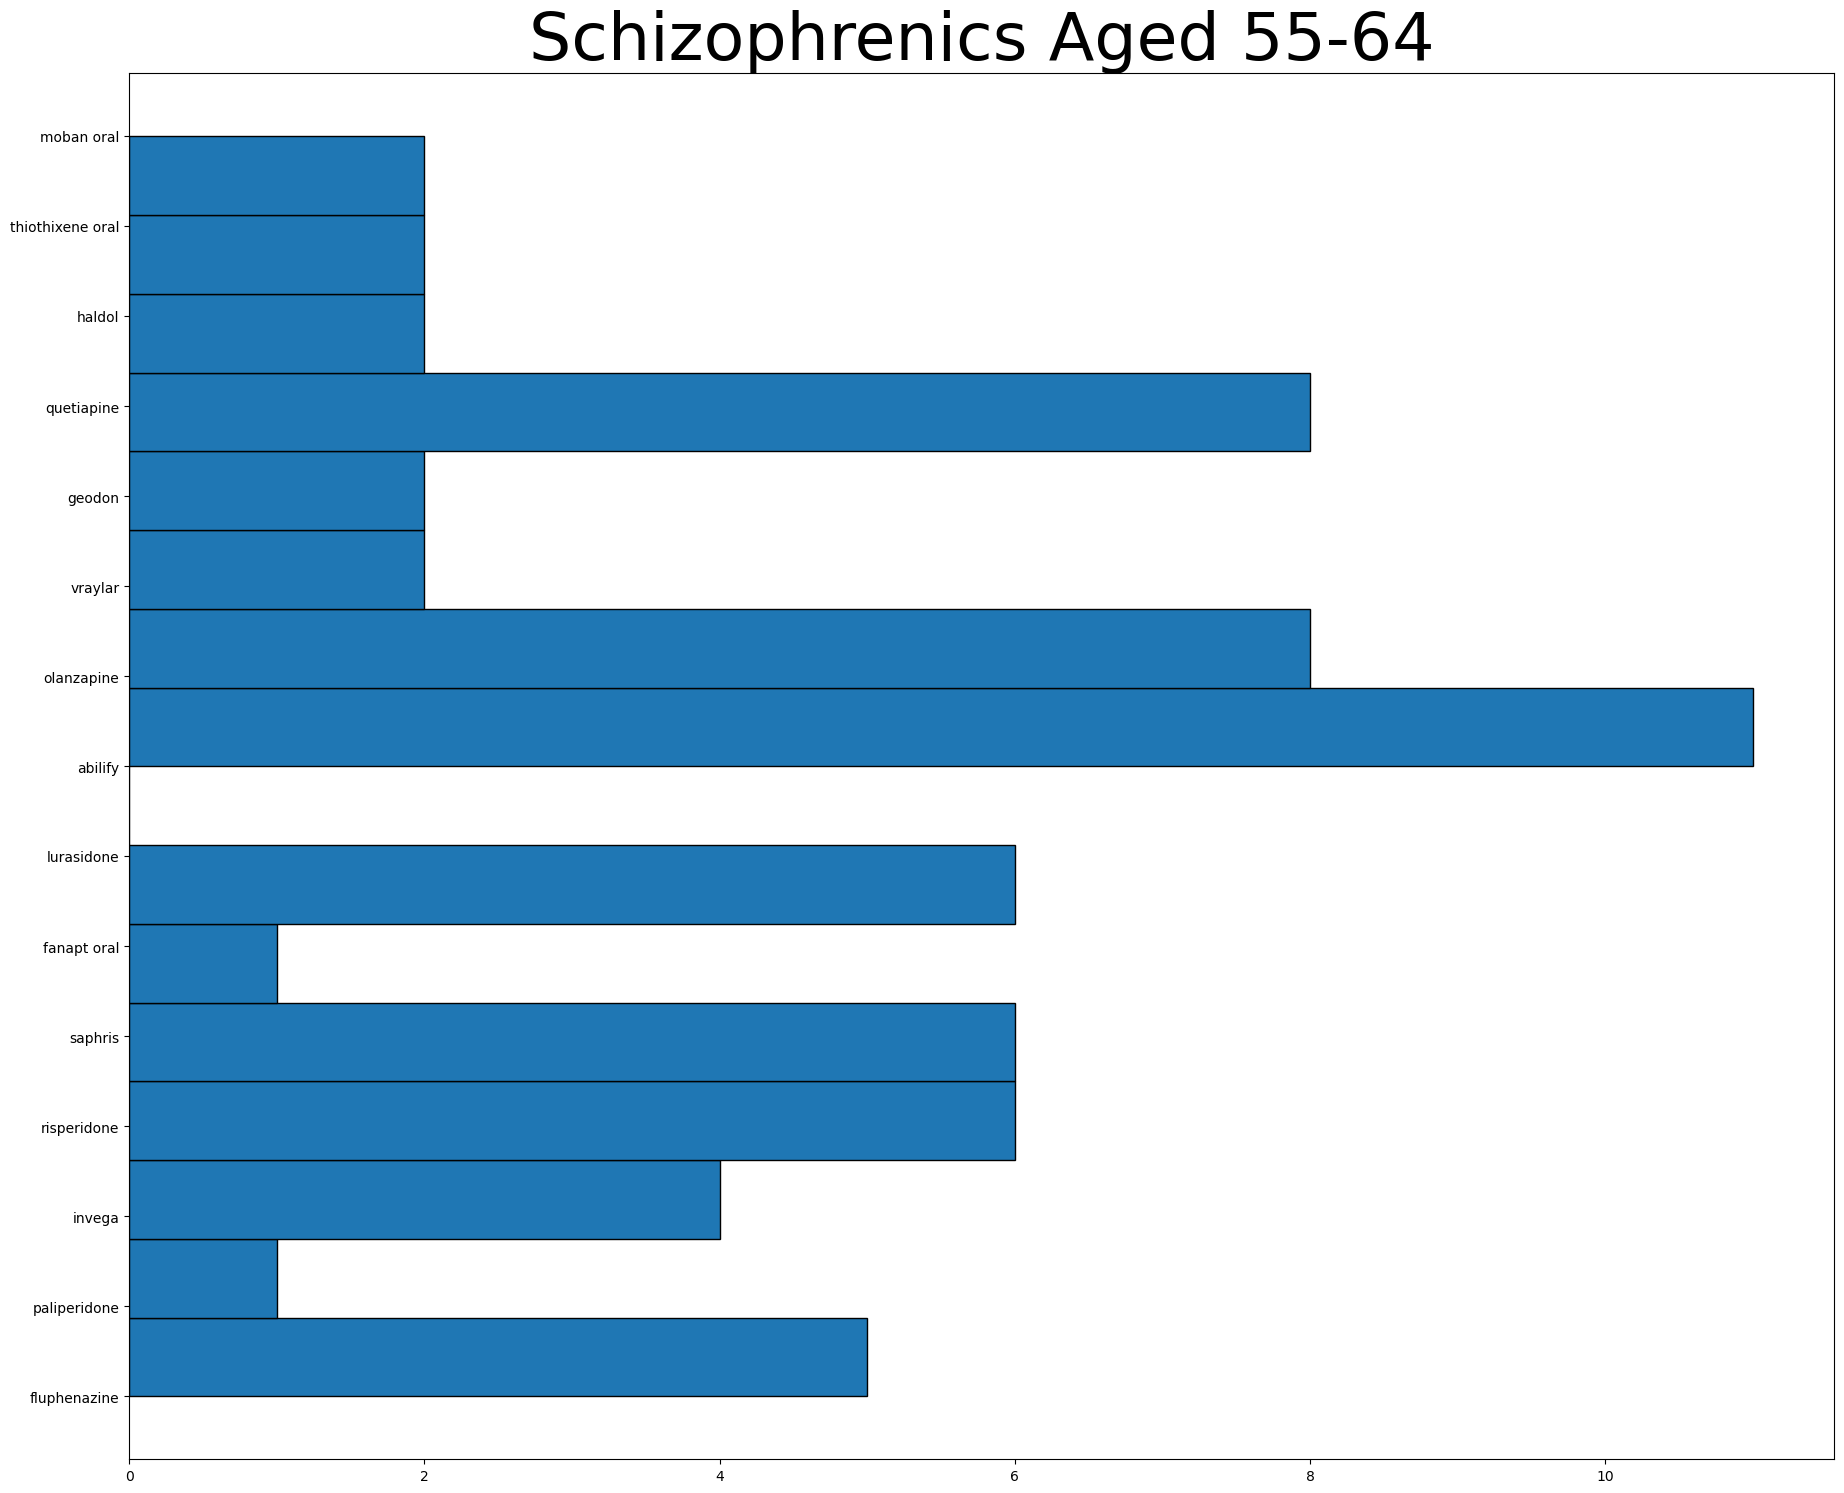

In [40]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 55-64', size = 48)
plt.hist(schizo_ages_55_64['drug_name'], bins = 16, edgecolor = 'black', orientation = 'horizontal')

(array([1., 3., 1., 1., 5., 5., 1., 4., 1., 1., 1.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

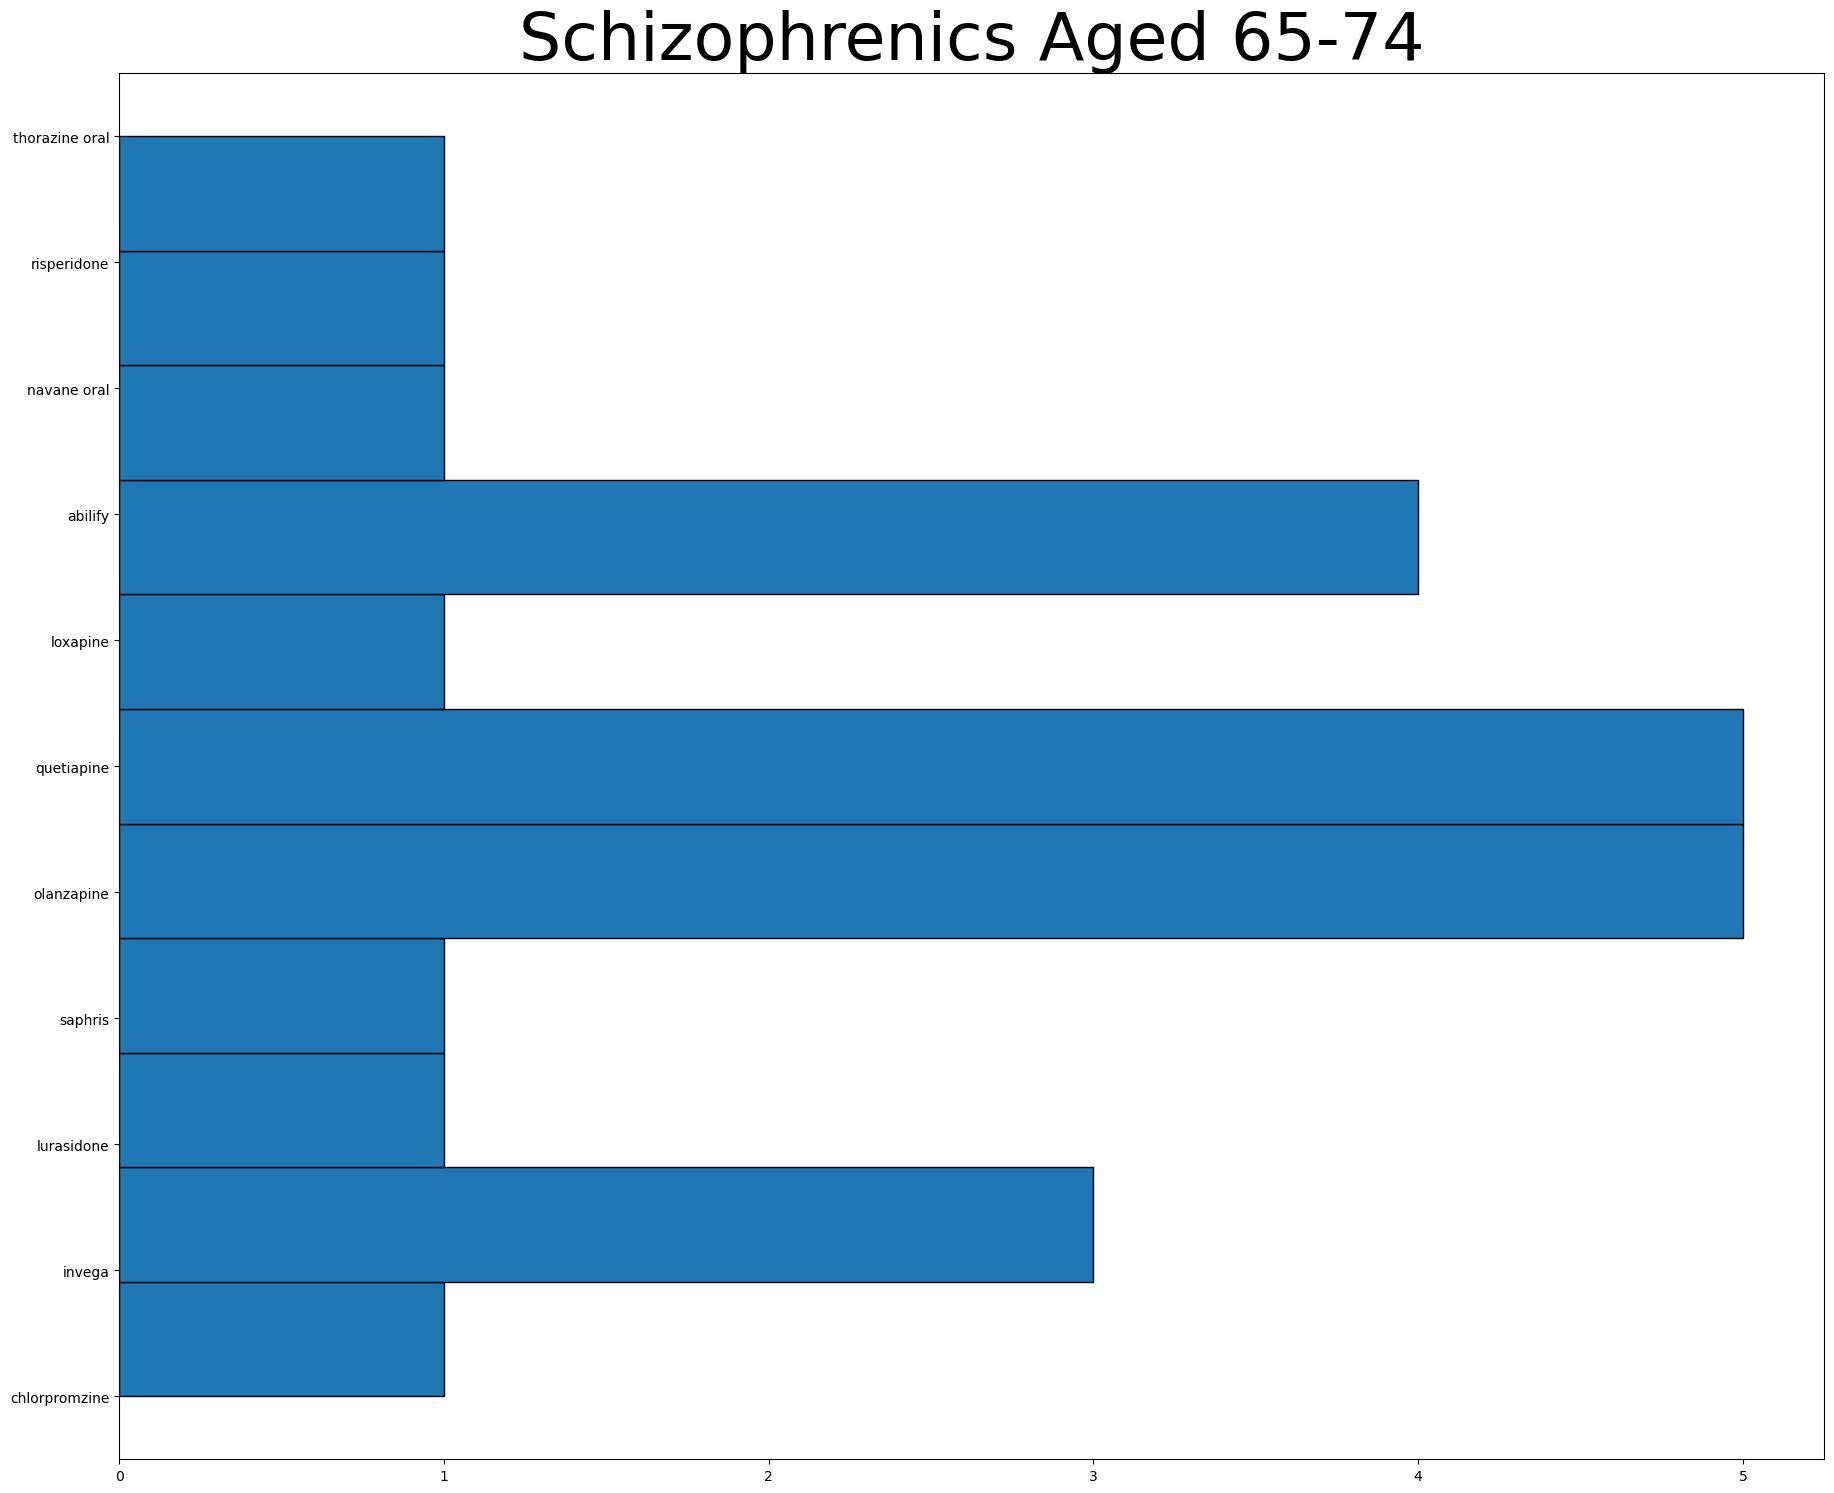

In [41]:
plt.figure(figsize = (22, 18))
plt.title('Schizophrenics Aged 65-74', size = 48)
plt.hist(schizo_ages_65_74['drug_name'], bins = 11, edgecolor = 'black', orientation = 'horizontal')

In [42]:
# Compute mean, variance, spread, and mode 
overall_mean = schizophrenia_reviews['rating_overall'].mean()
overall_var = schizophrenia_reviews['rating_overall'].var()
overall_std = schizophrenia_reviews['rating_overall'].std()
overall_mode = schizophrenia_reviews['rating_overall'].mode()
print('Mean is: ', round(overall_mean, 3), 'Variance is: ', round(overall_var, 3), 'Std. Deviation/Spread is: ', round(overall_std, 3), 'The mode is: ', overall_mode)

Mean is:  3.404 Variance is:  1.899 Std. Deviation/Spread is:  1.378 The mode is:  0    5.0
Name: rating_overall, dtype: float64


In [43]:
# Compute mean, variance, spread, and mode 
effect_mean = schizophrenia_reviews['rating_effectiveness'].mean()
effect_var = schizophrenia_reviews['rating_effectiveness'].var()
effect_std = schizophrenia_reviews['rating_effectiveness'].std()
effect_mode = schizophrenia_reviews['rating_effectiveness'].mode()
print('Mean is: ', round(effect_mean, 3), 'Variance is: ', round(effect_var, 3), 'Std. Deviation/Spread is: ', round(effect_std, 3), 'The mode is: ', effect_mode)

Mean is:  3.365 Variance is:  2.417 Std. Deviation/Spread is:  1.555 The mode is:  0    5
Name: rating_effectiveness, dtype: int64


In [44]:
# Compute mean, variance, spread, and mode 
ease_mean = schizophrenia_reviews['rating_ease_of_use'].mean()
ease_var = schizophrenia_reviews['rating_ease_of_use'].var()
ease_std = schizophrenia_reviews['rating_ease_of_use'].std()
ease_mode = schizophrenia_reviews['rating_ease_of_use'].mode()
print('Mean is: ', round(ease_mean, 3), 'Variance is: ', round(ease_var, 3), 'Std. Deviation/Spread is: ', round(ease_std, 3), 'The mode is: ', ease_mode)

Mean is:  3.903 Variance is:  2.114 Std. Deviation/Spread is:  1.454 The mode is:  0    5
Name: rating_ease_of_use, dtype: int64


In [45]:
# Compute mean, variance, spread, and mode 
sat_mean = schizophrenia_reviews['rating_satisfaction'].mean()
sat_var = schizophrenia_reviews['rating_satisfaction'].var()
sat_std = schizophrenia_reviews['rating_satisfaction'].std()
sat_mode = schizophrenia_reviews['rating_satisfaction'].mode()
print('Mean is: ', round(sat_mean, 3), 'Variance is: ', round(sat_var, 3), 'Std. Deviation/Spread is: ', round(sat_std, 3), 'The mode is: ', sat_mode)

Mean is:  2.945 Variance is:  2.659 Std. Deviation/Spread is:  1.631 The mode is:  0    1
Name: rating_satisfaction, dtype: int64


In [46]:
# Group female ratings overall
fem = schizophrenia_reviews.query("gender == 'Female'")['rating_overall']
# Group male ratings overall
men = schizophrenia_reviews.query("gender == 'Male'")['rating_overall']
# Make PMF for females then males
pmff = thinkstats2.Pmf(fem, label = 'Female')
pmfm = thinkstats2.Pmf(men, label = 'Male')

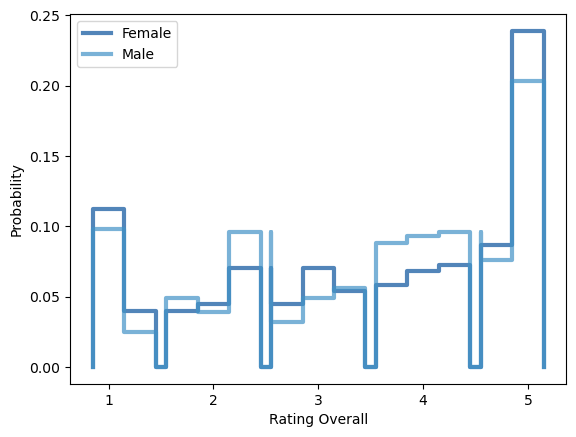

<Figure size 800x600 with 0 Axes>

In [47]:
# Plot PMFs
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmff, pmfm])
thinkplot.Show(xlabel = 'Rating Overall', ylabel = 'Probability')

In [48]:
# Make CDFs
cdff = thinkstats2.Cdf(fem, label = 'Female')
cdfm = thinkstats2.Cdf(men, label = 'Male')

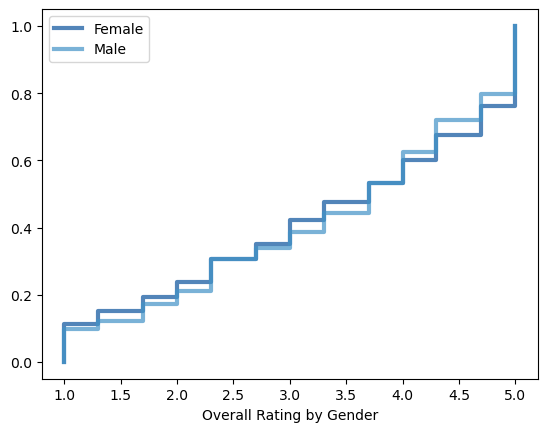

<Figure size 800x600 with 0 Axes>

In [49]:
# Plot CDFs
thinkplot.PrePlot(2)
thinkplot.Cdf(cdff)
thinkplot.Cdf(cdfm)
thinkplot.Show(xlabel = 'Overall Rating by Gender')

In [50]:
# Set overall to all overall ratings
overall = schizophrenia_reviews['rating_overall']

In [51]:
# Get log of overall
log_over = np.log10(overall)

In [52]:
# Make CDFs
cdf_over = thinkstats2.Cdf(overall, label = 'Rating Overall')
cdf_over_log = thinkstats2.Cdf(log_over, label = 'Rating Overall Log')

In [53]:
# Cannot divide by zero here so we must set the minimum as small as we can. Get xs and ys from Pareto
xs, ys = thinkstats2.RenderParetoCdf(xmin = 0.0000000000000000001, alpha = 1.8, low = 0, high = 5)

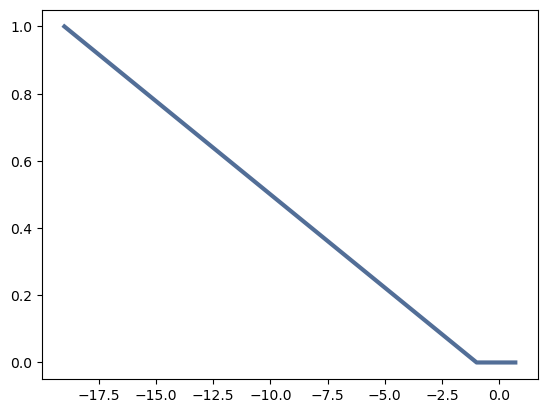

In [54]:
# Plot Pareto
thinkplot.Plot(np.log10(xs), 1 - ys, label = 'Pareto Model')

In [55]:
# Get different categories of ratings for each gender
female_e = schizophrenia_reviews.query("gender == 'Female'")['rating_effectiveness']
male_e = schizophrenia_reviews.query("gender == 'Male'")['rating_effectiveness']
female_ez = schizophrenia_reviews.query("gender == 'Female'")['rating_ease_of_use']
male_ez = schizophrenia_reviews.query("gender == 'Male'")['rating_ease_of_use']
female_s = schizophrenia_reviews.query("gender == 'Female'")['rating_satisfaction']
male_s = schizophrenia_reviews.query("gender == 'Male'")['rating_satisfaction']

Text(0.5, 1.0, 'Female Ratings Plotted Against Overall')

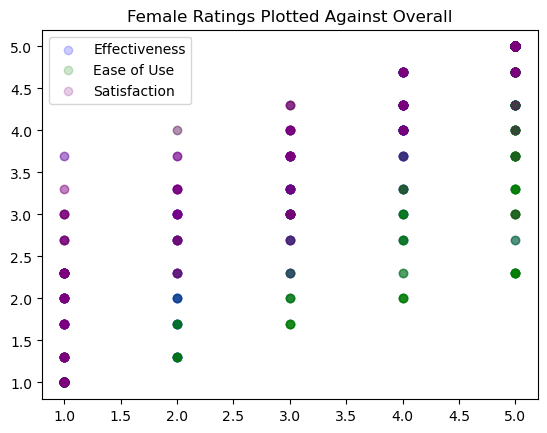

In [56]:
# Plot ratings vs. their overall rating for females
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(female_e, fem, color = 'blue', marker = 'o', label = 'Effectiveness', alpha = 0.2)
ax1.scatter(female_ez, fem, color = 'green', marker = 'o', label = 'Ease of Use', alpha = 0.2)
ax1.scatter(female_s, fem, color = 'purple', marker = 'o', label = 'Satisfaction', alpha = 0.2)
plt.legend(loc = 'upper left')
plt.title('Female Ratings Plotted Against Overall')

Text(0.5, 1.0, 'Male Ratings Plotted Against Overall')

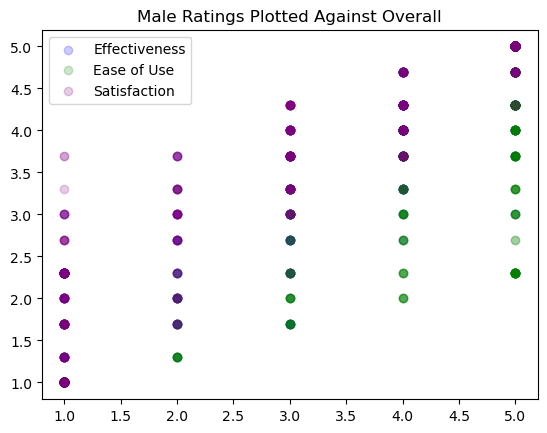

In [57]:
# Plot ratings vs. their overall ratings for males
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(male_e, men, color = 'blue', marker = 'o', label = 'Effectiveness', alpha = 0.2)
ax1.scatter(male_ez, men, color = 'green', marker = 'o', label = 'Ease of Use', alpha = 0.2)
ax1.scatter(male_s, men, color = 'purple', marker = 'o', label = 'Satisfaction', alpha = 0.2)
plt.legend(loc = 'upper left')
plt.title('Male Ratings Plotted Against Overall')

In [58]:
# Find covariance of effectiveness vs. overall for females
thinkstats2.Cov(female_e, fem)

2.0186086689445997

In [59]:
# Find covariance of ease of use vs. overall for females
thinkstats2.Cov(female_ez, fem)

1.7536760471455444

In [60]:
# Find covariance of satisfaction vs. overall for females
thinkstats2.Cov(female_s, fem)

2.1856144661573307

In [61]:
# Find covariance of effectiveness vs. overall for males
thinkstats2.Cov(male_e, men)

1.9037803969627072

In [62]:
# Find covariance of ease of use vs. overall for males
thinkstats2.Cov(male_ez, men)

1.521749447327951

In [63]:
# Find covariance of satisfaction vs. overall for males
thinkstats2.Cov(male_s, men)

1.9614553296808923

In [64]:
# Find Pearson's correlation of effectiveness vs. overall for females
thinkstats2.Corr(female_e, fem)

0.909645644980925

In [65]:
# Find Pearson's correlation of ease of use vs. overall for females
thinkstats2.Corr(female_ez, fem)

0.8261518718533655

In [66]:
# Find Pearson's correlation of satisfaction vs. overall for females
thinkstats2.Corr(female_s, fem)

0.9249058536616486

In [67]:
# Find Pearson's correlation of effectiveness vs. overall for males
thinkstats2.Corr(male_e, men)

0.9257883348948573

In [68]:
# Find Pearson's correlation of ease of use vs. overall for males
thinkstats2.Corr(male_ez, men)

0.8125722712242706

In [69]:
# Find Pearson's correlation of satisfaction vs. overall for males
thinkstats2.Corr(male_s, men)

0.9251706209704352

In [70]:
# Test hypothesis of different means
data = fem.values, men.values
ht = hypothesis.DiffMeansPermute(data)
ht.PValue()

0.81

In [71]:
# Find linear regression parameters
thinkstats2.LeastSquares(female_s, fem)

(1.0944191174745663, 0.7790341562209206)

Many people have mental health conditions that impact their lives, and they try to manage the illness using medications. We hear people talking about the poor performance or side effects of medications often, but how many people are satisfied with their treatment? We look to find this out for people with schizophrenia by exploring WebMD reviews of medications. We can gather information based on ratings: effectiveness, ease of use, satisfaction, and overall. We can also look between age groups and genders.
We found that the majority of people were happy with their medications. Based on the CDFs more than 50% of people put their overall rating at a four to five out of five. Men tended to be happier with their medications as they had fewer values below a four and more above. About 20% had an overall rating of five out of five, significantly more than I had thought it would be.
I think there could have been plenty of exploration of other illnesses. Additionally, I think I could have done more to make my question more specific by looking at the difference between first and second-generation anti-psychotics if I had kept the analysis limited to schizophrenia. Likewise, I feel I could have done more to explore the happiness with medications by age group.
I think having a column for first or second-generation anti-psychotics in the medications would have been helpful for evaluation. 
I don't feel I have a good grasp of the Pareto function or what it tells me. I tried to reread the chapter and did some outside digging, but I'm still unsure.